In [2]:
import numpy as np
import matplotlib.pyplot as plt

Veamos el problema 7. 

Tenemos un solenoide pequeño dentro de otro más grandote. Por el grandote circula una corriente lineal en el tiempo $I_1(t) = \alpha t + \beta$ que es dato. Por el solenoide pequeño, tenemos que ver que pasa. Usamos el subíndice $1$ para las variables del solenoide grande, y el subíndice $2$ para las del solenoide pequeño. 

Asumamos que conocemos</a><sup>[*]</sup> el coeficiente de inductancia mutua $M$. La auto-inductancia $L$ del solenoide pequeño el problema nos dice que también es dato. Por lo tanto el flujo de campo magnético a través del solenoide pequeño será $$ \Phi = L I_2 + M I_{1}$$. Por lo tanto, la ley de Faraday nos dice que se induce una f.e.m : $$ \mathcal{E} = -\frac{d\Phi}{dt} = -L \dot{I}_2 - M \dot{I}_{1} = -L \dot{I}_2 - M \alpha$$

y por ley de Ohm $ \mathcal{E} = I_2 R$ así que $$ I_2R+L \dot{I} =- M \alpha \Longrightarrow \dot{I}_2+\tau^{-1}I_2 =- \frac{M}{L} \alpha$$ en donde definimos $\tau = \dfrac{L}{R}$. La unidad para la auto-inductancia es el henry $H$ (o henrio en español) mientras que la unidad de resistencia es el ohm $\Omega$ (u ohmio), y se cumple que $1H = 1\Omega\, s$. Así que usamos la letra "tau" porque esta variable que definimos tiene unidades de tiempo. 

Resolviendo la ecuación diferencial que nos quedó para la corriente (asumiendo que inicialmente no circula corriente en el solenoide pequeño), llegamos a que $$ I_2(t) = - \frac{M}{R} \alpha \left ( 1-e^{-t/\tau} \right ) = I_0 \left ( 1-e^{-t/\tau} \right )$$

en donde definimos $I_0 = - \frac{M}{R} \alpha$ solo por comodidad. 


[*] ¿Cómo calculamos M? Como el solenoide que está dentro es bastante mas chico que el de afuera, podemos aproximar al campo del solenoide grandote como constate sobre la superficie del solenoide pequeño. En la guía 4, hicimos el cálculo del campo de un solenoide finito sobre su eje. Ese campo, lo evaluamos en $z=0$ y nos da $ B_1 = \dfrac{\mu_0 N_1 I_1}{2\sqrt{\left (\frac{L_1}{2}  \right )^2+r_1^2}}$ ($N$ es el número de vueltas, $L$ el largo y $r$ el radio). Con eso calculamos el flujo a través del chico $$ \Phi_{12} = B_1 N_2\pi r_2^2 = \dfrac{\mu_0 N_1 I_1}{2\sqrt{\left (\frac{L_1}{2}  \right )^2+r_1^2}}N_2\pi r_2^2$$ y por lo tanto $$M_{12} = M = \dfrac{\mu_0 N_1N_2\pi r_2^2}{2\sqrt{\left (\frac{L_1}{2}  \right )^2+r_1^2}}$$

Poniendo los datos del problema, tenemos que $M =0.35$mH.

Para lo que sigue, vamos a asumir que la auto-inductancia del solenoide pequeño es $L=0.5$H. Además, según los datos del problema tenemos que $\alpha = -8A/s$. Así que $I_0 = 56\mu$A. Además nos queda que $\tau = 10$ms.



I0:  56.49691226077927
tau:  0.01


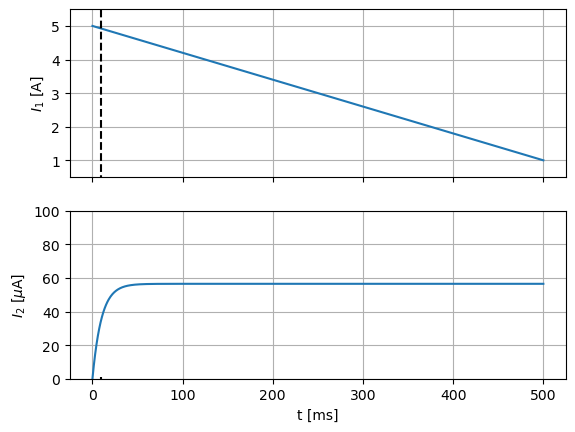

In [74]:
N1, N2 = 1000, 100
L1 = 40e-2
r1, r2 = 10e-2, 2e-2
mu0 = 4*np.pi * 1e-7
M = mu0*N1*N2*np.pi*r2**2 / (2*np.sqrt((L1/2)**2+r1**2))
L = .5
R = 50
tau = L/R
alpha = -8
I0 = -alpha*M/R

print("I0: ", I0*1e6)
print("tau: ", tau)

t = np.linspace(0, 0.5, 1000)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
ax1.plot(t*1000, 5+alpha*t)
ax2.plot(t*1000, I0*(1-np.exp(-t/tau))*1e6)
ax1.vlines(1000*tau, 0, 6, linestyle = 'dashed', color = 'k')
ax2.vlines(1000*tau, 0, 1, linestyle = 'dashed', color = 'k')

ax1.grid()
ax2.grid()
ax1.set_ylim(0.5, 5.5)
ax2.set_ylim(0, 100)
ax2.set_xlabel('t [ms]')
ax1.set_ylabel('$I_1$ [A]')
ax2.set_ylabel('$I_2$ [$\mu$A]');


Hasta acá es lo que hicimos en clase. La pregunta ahora es qué pasa si, por ejemplo, a los 5 segundos la corriente en el solenoide grandote dejara de disminuir y se mantuviera constante en un valor de 1 A a partir de ese momento. Para ver qué pasa hay que nuevamente plantear las ecuaciones, pero en este caso no habrá f.e.m inducida por la inductancia mutua. Por lo tanto, tenemos que $$ \mathcal{E} = -\frac{d\Phi}{dt}  = -L \dot{I}_2 \Longrightarrow RI= -L \dot{I}_2$$ pero ahora tendremos como condición inicial $I(0) = I_0$. La solución resulta entonces $$ I_2(t) = I_0 e^{-t/\tau}$$

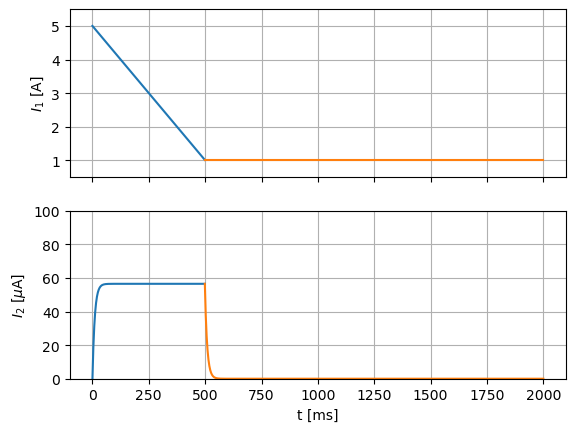

In [79]:
t = np.linspace(0, 2, 1000)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
t1 = t[0:250]
ax1.plot(t1*1000, 5+alpha*t1)
ax2.plot(t1*1000, I0*(1-np.exp(-t1/tau))*1e6)

t2 = t[249:]
ax1.plot(t2*1000, 1+0*t2)
ax2.plot(t2*1000, I0*np.exp(-(t2-t[249])/tau)*1e6)

ax1.grid()
ax2.grid()
ax1.set_ylim(0.5, 5.5)
ax2.set_ylim(0, 100)
ax2.set_xlabel('t [ms]')
ax1.set_ylabel('$I_1$ [A]')
ax2.set_ylabel('$I_2$ [$\mu$A]');